# K Nearest Neighbors
In this project, we'll use the KNN algorithm to classify instances from a fake dataset into one or the other target class.

In [28]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data

In [29]:
A=pd.read_csv("datasets/Credit.csv")

In [45]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [31]:
A.iloc[0:10,1:5]

,ID,Income,Limit,Rating
0,1,14.891,3606,283
1,2,106.025,6645,483
2,3,104.593,7075,514
3,4,148.924,9504,681
4,5,55.882,4897,357
5,6,80.180,8047,569
6,7,20.996,3388,259
7,8,71.408,7114,512
8,9,15.125,3300,266
9,10,71.061,6819,491


In [32]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   ID          400 non-null    int64  
 2   Income      400 non-null    float64
 3   Limit       400 non-null    int64  
 4   Rating      400 non-null    int64  
 5   Cards       400 non-null    int64  
 6   Age         400 non-null    int64  
 7   Education   400 non-null    int64  
 8   Gender      400 non-null    object 
 9   Student     400 non-null    object 
 10  Married     400 non-null    object 
 11  Ethnicity   400 non-null    object 
 12  Balance     400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


# Visualising

In [33]:
CAT=[]
CON=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        CAT.append(i)
    else:
        CON.append(i)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


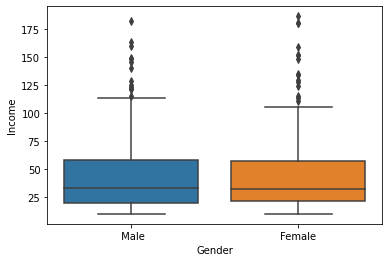

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


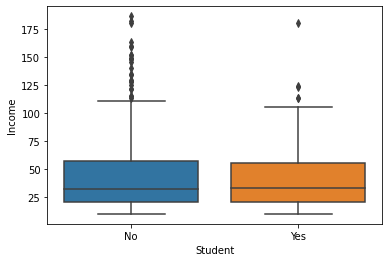

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


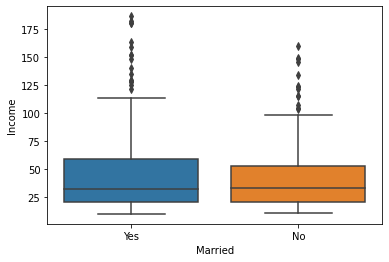

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


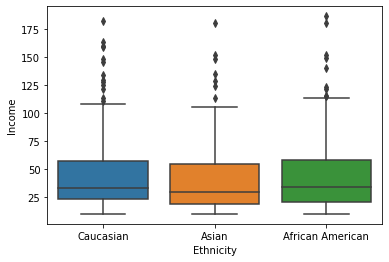

In [34]:
for i in  CAT:
    sb.boxplot(A[i],A.Income)
    plt.show()

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


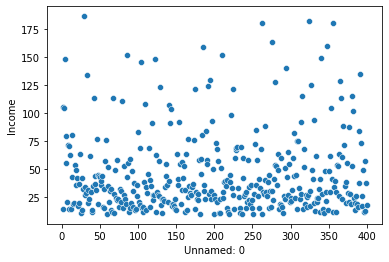

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


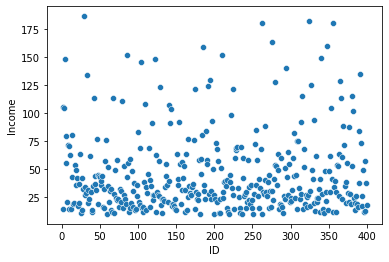

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


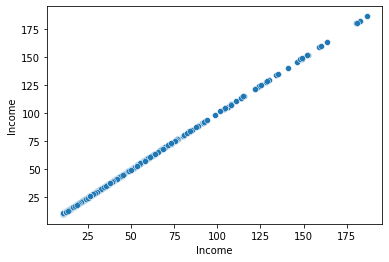

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


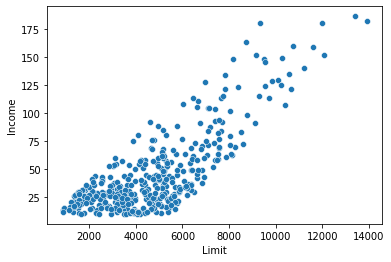

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


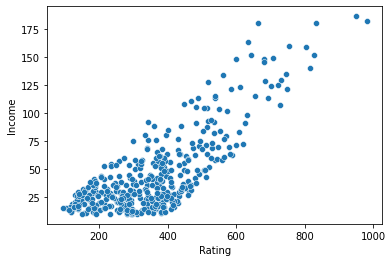

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


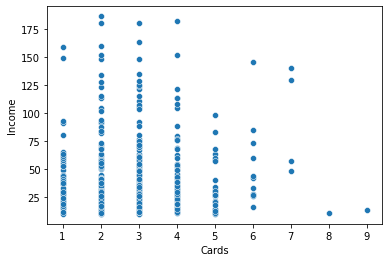

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


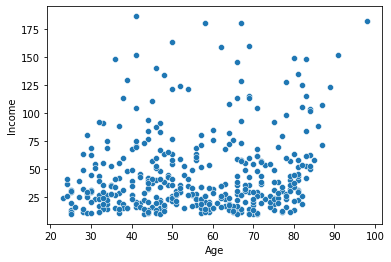

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


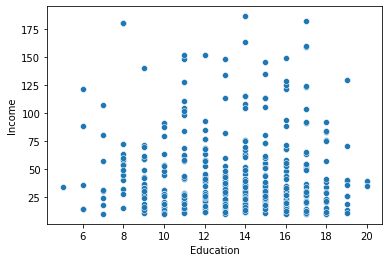

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


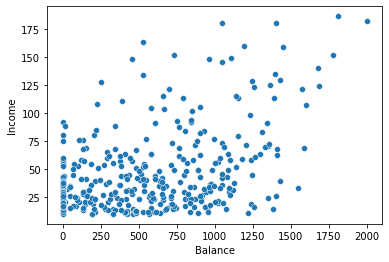

In [35]:
for i in CON:
    sb.scatterplot(A[i],A.Income)
    plt.show()

# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B=A.apply(le.fit_transform)

In [46]:
B.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,0,43,131,99,1,11,6,0,0,1,2,67
1,1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,4,294,215,143,1,45,11,0,0,1,2,66


# Model Building

In [37]:
#Begin with splitting the data into training and test sets
#from sklearn.model_selection import train_test_split
X=B[B.columns[~B.columns.isin(['Income','Unnamed: 0'])]]
Y=B[["Income"]]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=30)

# Choosing a K Value
A major part of building a ML model with KNN, is choosing a K value to improve the performance of our model. Let's go ahead and use the elbow method to do that.

We will create a loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2,30)}
cv = GridSearchCV(knn,tp,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(xtrain,ytrain)

In [39]:
cv.best_params_

{'n_neighbors': 5}

# Retrain with new K Value

Fitting our model

In [40]:
knn=KNeighborsRegressor(n_neighbors=5)
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

55.181666666666665